<a href="https://colab.research.google.com/github/RachelRamirez/CIFAR-10/blob/main/Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

import numpy as np

Make Image Datasets

In [2]:
dataset, info = tfds.load('cifar10', split=tfds.Split.TRAIN, with_info = True)

dataset_airplanes   = dataset.filter(lambda x: x['label'] == 0)
dataset_automobiles = dataset.filter(lambda x: x['label'] == 1)
dataset_birds       = dataset.filter(lambda x: x['label'] == 2)
dataset_cats        = dataset.filter(lambda x: x['label'] == 3)
dataset_deers       = dataset.filter(lambda x: x['label'] == 4)
dataset_dogs        = dataset.filter(lambda x: x['label'] == 5)
dataset_frogs       = dataset.filter(lambda x: x['label'] == 6)
dataset_horses      = dataset.filter(lambda x: x['label'] == 7)
dataset_ships       = dataset.filter(lambda x: x['label'] == 8)
dataset_trucks      = dataset.filter(lambda x: x['label'] == 9)

##  Ways to count the number of images in the sets:
print(tf.data.experimental.cardinality(dataset).numpy()) #   prints 50,000, correct
print(tf.data.experimental.cardinality(dataset_airplanes).numpy()) #   prints -2 this is a "feature" in tf when a set takes too long to count
# print(dataset_airplanes.reduce(np.int64(0), lambda x,_ : x + 1).numpy()) #prints 5000, correct

##  This is a way of asserting that all the images have the same label in a set
for feature_dict in dataset_dogs:
  assert feature_dict['label'] == 5
 

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteS0WW0U/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteS0WW0U/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
50000
-2


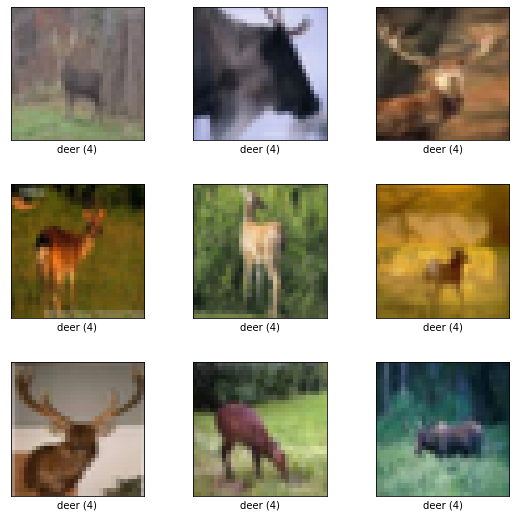

In [3]:
## Tfds.show_examples is a matplotlib funnction that only works on image ds's, and you have to pass it the "info" for some reason
fig = tfds.show_examples(dataset_deers, info)

How to display one picture of a dataset using `next(iter(dataset)`

tf.Tensor(5, shape=(), dtype=int64)


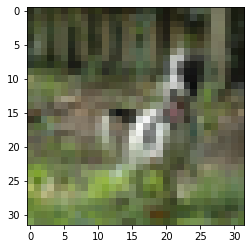

In [4]:
feature_dict = next(iter(dataset_dogs))

print(feature_dict['label'])
plt.imshow(feature_dict['image'])

# Get 1000 samples from each dataset class and create validation set

In [5]:
# I want 10 un replicated samples from dataset_airplanes + dataset_automobiles... dataset_trucks.

# There are 5000 images of each Class 
# I want 10 equal sets A, B, C, D, ... J plus a validation set
# I want 10,000 total images in the validation set with 1000 of each class
# and I want 10 sets of training images  4000 total images, so 400 images in each class

N = 1000
dataset_airplanes_val   = dataset_airplanes.take(N)
dataset_automobiles_val  = dataset_automobiles.take(N)
dataset_birds_val       = dataset_birds.take(N)  
dataset_cats_val        = dataset_cats.take(N)
dataset_deers_val       = dataset_deers.take(N)
dataset_dogs_val        = dataset_dogs.take(N)
dataset_frogs_val       = dataset_frogs.take(N)
dataset_horses_val      = dataset_horses.take(N)
dataset_ships_val       = dataset_ships.take(N)
dataset_trucks_val      = dataset_trucks.take(N)


# Make sure to skip the next 1000 images in each data set before making training set
dataset_airplanes   = dataset_airplanes.skip(N)
dataset_automobiles  = dataset_automobiles.skip(N)
dataset_birds      = dataset_birds.skip(N)  
dataset_cats        = dataset_cats.skip(N)
dataset_deers       = dataset_deers.skip(N)
dataset_dogs        = dataset_dogs.skip(N)
dataset_frogs       = dataset_frogs.skip(N)
dataset_horses      = dataset_horses.skip(N)
dataset_ships       = dataset_ships.skip(N)
dataset_trucks      = dataset_trucks.skip(N)

# # Check that remaining dataset does not have validation data
# fig = tfds.show_examples(dataset_ships, info)
# fig = tfds.show_examples(dataset_ships_val, info)
# # I checked and they dont.


# NOW, How do I combine my val sets?

# Hint1 its not this... 
# val = dataset_airplanes_val + dataset_automobile_val + dataset_birds_val

# #  Hint2 its also not this implementation of zip because the info file doesn't match it
# val = tf.data.Dataset.zip((dataset_airplanes_val,
#                     dataset_automobile_val,
#                     dataset_birds_val,
#                     dataset_cats_val,
#                     dataset_deers_val,
#                     dataset_dogs_val,
#                     dataset_frogs_val,
#                     dataset_horses_val,
#                     dataset_ships_val,
#                     dataset_trucks_val ))
 
# fig = tfds.show_examples(val, info)   # Returns a warning that the info file is not compatible


# is it concatenate? YESSSSSSSSSSSSSSSSSSSSSS
val = dataset_airplanes_val.concatenate(dataset_automobiles_val)
# This is how I checked that it worked
# fig = tfds.show_examples(val.skip(999), info)    # shows 1 airplane and then 8 automobiles

val = val.concatenate(dataset_birds_val)
val = val.concatenate(dataset_cats_val)
val = val.concatenate(dataset_deers_val)
val = val.concatenate(dataset_dogs_val)
val = val.concatenate(dataset_frogs_val)
val = val.concatenate(dataset_horses_val)
val = val.concatenate(dataset_ships_val)
val = val.concatenate(dataset_trucks_val)
 
# print(val.cardinality())  # returns -2 
print(val.reduce(np.int32(0), lambda x,_ : x + 1))  # this shows 10000! Thank goodness! :-)



# Now I need to split the remaining images of each data set in the remaining datasets into different training groups and
# mini_ds_airplanes = dataset_airplanes.skip(9)
# mini_ds_airplanes = mini_ds_airplanes.take(9)
# B = dataset_airplanes.shard(400, index=0)
# C = dataset_airplanes.shard(1000, index=1)
# list(B.as_numpy_iterator())
# list(C.as_numpy_iterator())
# mini_ds_airplanes
# plt.imshow(feature_dict['image'])
40000/16/10

tf.Tensor(10000, shape=(), dtype=int32)


250.0

# Create 16 small groups of training_sets: plan

The image below is a table of the planned training set divided into 16 groups of 250 images per class, resulting in each of the 16 groups named A through P, having a total of 2500 images each.  There are initially 16 groups, and then they are merged by 2s into 8 groups of 2s, and then 4 groups of 4, until they are merged for the 5th time into one large group of 16 groups, which is the original training set.  This grouping and division allows one to study 5 different image sizes, and the number per class is a relatively easy number to work with for reviewing the final confusion matrices resulting from each run.  Although there are many discrete mathematical combinations possible for combining the groups, this is not the focus of the study, the goal is to have a clear  data division that is repeatable and consistent throughout the test.   

 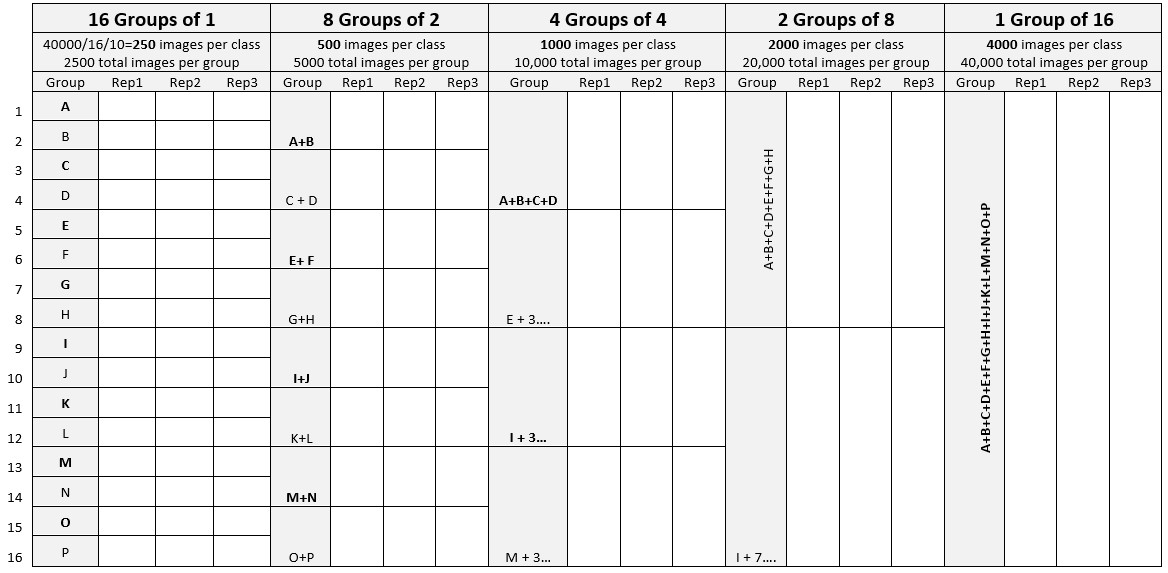

# Create 16 small groups of training_sets: implementation

The plan is to see if I can use shards to make the data division easy.   Can I just "shard" the remaining training set into 16 groups?

#### Airplanes

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shard

# Check that each of the remaining 10 datasets has only 4000 images 
print(dataset_airplanes.reduce(np.int32(0), lambda x,_ : x + 1))  # 4000 check!

# Shard each of the remaining 10 datasets into 16 smaller groups
airplanes_A = dataset_airplanes.shard(num_shards=16, index = 0)
airplanes_B = dataset_airplanes.shard(num_shards=16, index = 1)
airplanes_C = dataset_airplanes.shard(num_shards=16, index = 2)
airplanes_D = dataset_airplanes.shard(num_shards=16, index = 3)
airplanes_E = dataset_airplanes.shard(num_shards=16, index = 4)
airplanes_F = dataset_airplanes.shard(num_shards=16, index = 5)
airplanes_G = dataset_airplanes.shard(num_shards=16, index = 6)
airplanes_H = dataset_airplanes.shard(num_shards=16, index = 7)
airplanes_I = dataset_airplanes.shard(num_shards=16, index = 8)
airplanes_J = dataset_airplanes.shard(num_shards=16, index = 9)
airplanes_K = dataset_airplanes.shard(num_shards=16, index = 10)
airplanes_L = dataset_airplanes.shard(num_shards=16, index = 11)
airplanes_M = dataset_airplanes.shard(num_shards=16, index = 12)
airplanes_N = dataset_airplanes.shard(num_shards=16, index = 13)
airplanes_O = dataset_airplanes.shard(num_shards=16, index = 14)
airplanes_P = dataset_airplanes.shard(num_shards=16, index = 15)

#check that a random airplane dataset only has 250 images
print(airplanes_M.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!







tf.Tensor(4000, shape=(), dtype=int32)
tf.Tensor(250, shape=(), dtype=int32)


#### Automobiles

In [7]:
# dataset_automobile

# Check that each of the remaining 10 datasets has only 4000 images 
# print(dataset_automobile.reduce(np.int32(0), lambda x,_ : x + 1))  # 4000 check!

# Shard each of the remaining 10 datasets into 16 smaller groups
automobiles_A = dataset_automobiles.shard(num_shards=16, index = 0)
automobiles_B = dataset_automobiles.shard(num_shards=16, index = 1)
automobiles_C = dataset_automobiles.shard(num_shards=16, index = 2)
automobiles_D = dataset_automobiles.shard(num_shards=16, index = 3)
automobiles_E = dataset_automobiles.shard(num_shards=16, index = 4)
automobiles_F = dataset_automobiles.shard(num_shards=16, index = 5)
automobiles_G = dataset_automobiles.shard(num_shards=16, index = 6)
automobiles_H = dataset_automobiles.shard(num_shards=16, index = 7)
automobiles_I = dataset_automobiles.shard(num_shards=16, index = 8)
automobiles_J = dataset_automobiles.shard(num_shards=16, index = 9)
automobiles_K = dataset_automobiles.shard(num_shards=16, index = 10)
automobiles_L = dataset_automobiles.shard(num_shards=16, index = 11)
automobiles_M = dataset_automobiles.shard(num_shards=16, index = 12)
automobiles_N = dataset_automobiles.shard(num_shards=16, index = 13)
automobiles_O = dataset_automobiles.shard(num_shards=16, index = 14)
automobiles_P = dataset_automobiles.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(airplanes_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


tf.Tensor(250, shape=(), dtype=int32)


#### Birds

In [8]:
# dataset_birds

# Shard each of the remaining 10 datasets into 16 smaller groups
birds_A = dataset_birds.shard(num_shards=16, index = 0)
birds_B = dataset_birds.shard(num_shards=16, index = 1)
birds_C = dataset_birds.shard(num_shards=16, index = 2)
birds_D = dataset_birds.shard(num_shards=16, index = 3)
birds_E = dataset_birds.shard(num_shards=16, index = 4)
birds_F = dataset_birds.shard(num_shards=16, index = 5)
birds_G = dataset_birds.shard(num_shards=16, index = 6)
birds_H = dataset_birds.shard(num_shards=16, index = 7)
birds_I = dataset_birds.shard(num_shards=16, index = 8)
birds_J = dataset_birds.shard(num_shards=16, index = 9)
birds_K = dataset_birds.shard(num_shards=16, index = 10)
birds_L = dataset_birds.shard(num_shards=16, index = 11)
birds_M = dataset_birds.shard(num_shards=16, index = 12)
birds_N = dataset_birds.shard(num_shards=16, index = 13)
birds_O = dataset_birds.shard(num_shards=16, index = 14)
birds_P = dataset_birds.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(airplanes_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


tf.Tensor(250, shape=(), dtype=int32)


#### Cats

In [9]:
# dataset_cats
 

# Shard each of the remaining 10 datasets into 16 smaller groups
cats_A = dataset_cats.shard(num_shards=16, index = 0)
cats_B = dataset_cats.shard(num_shards=16, index = 1)
cats_C = dataset_cats.shard(num_shards=16, index = 2)
cats_D = dataset_cats.shard(num_shards=16, index = 3)
cats_E = dataset_cats.shard(num_shards=16, index = 4)
cats_F = dataset_cats.shard(num_shards=16, index = 5)
cats_G = dataset_cats.shard(num_shards=16, index = 6)
cats_H = dataset_cats.shard(num_shards=16, index = 7)
cats_I = dataset_cats.shard(num_shards=16, index = 8)
cats_J = dataset_cats.shard(num_shards=16, index = 9)
cats_K = dataset_cats.shard(num_shards=16, index = 10)
cats_L = dataset_cats.shard(num_shards=16, index = 11)
cats_M = dataset_cats.shard(num_shards=16, index = 12)
cats_N = dataset_cats.shard(num_shards=16, index = 13)
cats_O = dataset_cats.shard(num_shards=16, index = 14)
cats_P = dataset_cats.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(cats_P.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!



tf.Tensor(250, shape=(), dtype=int32)


#### Deer(s)

In [10]:
# dataset_deers

# Shard each of the remaining 10 datasets into 16 smaller groups
deers_A = dataset_deers.shard(num_shards=16, index = 0)
deers_B = dataset_deers.shard(num_shards=16, index = 1)
deers_C = dataset_deers.shard(num_shards=16, index = 2)
deers_D = dataset_deers.shard(num_shards=16, index = 3)
deers_E = dataset_deers.shard(num_shards=16, index = 4)
deers_F = dataset_deers.shard(num_shards=16, index = 5)
deers_G = dataset_deers.shard(num_shards=16, index = 6)
deers_H = dataset_deers.shard(num_shards=16, index = 7)
deers_I = dataset_deers.shard(num_shards=16, index = 8)
deers_J = dataset_deers.shard(num_shards=16, index = 9)
deers_K = dataset_deers.shard(num_shards=16, index = 10)
deers_L = dataset_deers.shard(num_shards=16, index = 11)
deers_M = dataset_deers.shard(num_shards=16, index = 12)
deers_N = dataset_deers.shard(num_shards=16, index = 13)
deers_O = dataset_deers.shard(num_shards=16, index = 14)
deers_P = dataset_deers.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(deers_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


tf.Tensor(250, shape=(), dtype=int32)


#### Dogs

In [11]:
# dataset_dogs
# Shard each of the remaining 10 datasets into 16 smaller groups
dogs_A = dataset_dogs.shard(num_shards=16, index = 0)
dogs_B = dataset_dogs.shard(num_shards=16, index = 1)
dogs_C = dataset_dogs.shard(num_shards=16, index = 2)
dogs_D = dataset_dogs.shard(num_shards=16, index = 3)
dogs_E = dataset_dogs.shard(num_shards=16, index = 4)
dogs_F = dataset_dogs.shard(num_shards=16, index = 5)
dogs_G = dataset_dogs.shard(num_shards=16, index = 6)
dogs_H = dataset_dogs.shard(num_shards=16, index = 7)
dogs_I = dataset_dogs.shard(num_shards=16, index = 8)
dogs_J = dataset_dogs.shard(num_shards=16, index = 9)
dogs_K = dataset_dogs.shard(num_shards=16, index = 10)
dogs_L = dataset_dogs.shard(num_shards=16, index = 11)
dogs_M = dataset_dogs.shard(num_shards=16, index = 12)
dogs_N = dataset_dogs.shard(num_shards=16, index = 13)
dogs_O = dataset_dogs.shard(num_shards=16, index = 14)
dogs_P = dataset_dogs.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(dogs_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


tf.Tensor(250, shape=(), dtype=int32)


#### Frogs

In [12]:
# dataset_frogs
# Shard each of the remaining 10 datasets into 16 smaller groups
frogs_A = dataset_frogs.shard(num_shards=16, index = 0)
frogs_B = dataset_frogs.shard(num_shards=16, index = 1)
frogs_C = dataset_frogs.shard(num_shards=16, index = 2)
frogs_D = dataset_frogs.shard(num_shards=16, index = 3)
frogs_E = dataset_frogs.shard(num_shards=16, index = 4)
frogs_F = dataset_frogs.shard(num_shards=16, index = 5)
frogs_G = dataset_frogs.shard(num_shards=16, index = 6)
frogs_H = dataset_frogs.shard(num_shards=16, index = 7)
frogs_I = dataset_frogs.shard(num_shards=16, index = 8)
frogs_J = dataset_frogs.shard(num_shards=16, index = 9)
frogs_K = dataset_frogs.shard(num_shards=16, index = 10)
frogs_L = dataset_frogs.shard(num_shards=16, index = 11)
frogs_M = dataset_frogs.shard(num_shards=16, index = 12)
frogs_N = dataset_frogs.shard(num_shards=16, index = 13)
frogs_O = dataset_frogs.shard(num_shards=16, index = 14)
frogs_P = dataset_frogs.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(frogs_A.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


tf.Tensor(250, shape=(), dtype=int32)


#### Horses

In [13]:
# dataset_horses
# Shard each of the remaining 10 datasets into 16 smaller groups
horses_A = dataset_horses.shard(num_shards=16, index = 0)
horses_B = dataset_horses.shard(num_shards=16, index = 1)
horses_C = dataset_horses.shard(num_shards=16, index = 2)
horses_D = dataset_horses.shard(num_shards=16, index = 3)
horses_E = dataset_horses.shard(num_shards=16, index = 4)
horses_F = dataset_horses.shard(num_shards=16, index = 5)
horses_G = dataset_horses.shard(num_shards=16, index = 6)
horses_H = dataset_horses.shard(num_shards=16, index = 7)
horses_I = dataset_horses.shard(num_shards=16, index = 8)
horses_J = dataset_horses.shard(num_shards=16, index = 9)
horses_K = dataset_horses.shard(num_shards=16, index = 10)
horses_L = dataset_horses.shard(num_shards=16, index = 11)
horses_M = dataset_horses.shard(num_shards=16, index = 12)
horses_N = dataset_horses.shard(num_shards=16, index = 13)
horses_O = dataset_horses.shard(num_shards=16, index = 14)
horses_P = dataset_horses.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(horses_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


tf.Tensor(250, shape=(), dtype=int32)


#### Ships

In [14]:
# dataset_ships
# Shard each of the remaining 10 datasets into 16 smaller groups
ships_A = dataset_ships.shard(num_shards=16, index = 0)
ships_B = dataset_ships.shard(num_shards=16, index = 1)
ships_C = dataset_ships.shard(num_shards=16, index = 2)
ships_D = dataset_ships.shard(num_shards=16, index = 3)
ships_E = dataset_ships.shard(num_shards=16, index = 4)
ships_F = dataset_ships.shard(num_shards=16, index = 5)
ships_G = dataset_ships.shard(num_shards=16, index = 6)
ships_H = dataset_ships.shard(num_shards=16, index = 7)
ships_I = dataset_ships.shard(num_shards=16, index = 8)
ships_J = dataset_ships.shard(num_shards=16, index = 9)
ships_K = dataset_ships.shard(num_shards=16, index = 10)
ships_L = dataset_ships.shard(num_shards=16, index = 11)
ships_M = dataset_ships.shard(num_shards=16, index = 12)
ships_N = dataset_ships.shard(num_shards=16, index = 13)
ships_O = dataset_ships.shard(num_shards=16, index = 14)
ships_P = dataset_ships.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(ships_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


tf.Tensor(250, shape=(), dtype=int32)


#### Trucks


In [15]:
# dataset_trucks
# Shard each of the remaining 10 datasets into 16 smaller groups
trucks_A = dataset_trucks.shard(num_shards=16, index = 0)
trucks_B = dataset_trucks.shard(num_shards=16, index = 1)
trucks_C = dataset_trucks.shard(num_shards=16, index = 2)
trucks_D = dataset_trucks.shard(num_shards=16, index = 3)
trucks_E = dataset_trucks.shard(num_shards=16, index = 4)
trucks_F = dataset_trucks.shard(num_shards=16, index = 5)
trucks_G = dataset_trucks.shard(num_shards=16, index = 6)
trucks_H = dataset_trucks.shard(num_shards=16, index = 7)
trucks_I = dataset_trucks.shard(num_shards=16, index = 8)
trucks_J = dataset_trucks.shard(num_shards=16, index = 9)
trucks_K = dataset_trucks.shard(num_shards=16, index = 10)
trucks_L = dataset_trucks.shard(num_shards=16, index = 11)
trucks_M = dataset_trucks.shard(num_shards=16, index = 12)
trucks_N = dataset_trucks.shard(num_shards=16, index = 13)
trucks_O = dataset_trucks.shard(num_shards=16, index = 14)
trucks_P = dataset_trucks.shard(num_shards=16, index = 15)


#check that a random airplane dataset only has 250 images
print(trucks_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250 check!


tf.Tensor(250, shape=(), dtype=int32)


# Merge 1/16th of each CIFAR Training Datasets into 16 Small training Groups {A}, {B}, {C} , ... {P}

#### Group A

In [16]:
# {A}
X = birds_A, cats_A, deers_A, dogs_A, frogs_A, horses_A, ships_A, trucks_A
train_A = airplanes_A.concatenate(automobiles_A)

for i in list(X):
  train_A = train_A.concatenate(i)

print(train_A.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 


tf.Tensor(2500, shape=(), dtype=int32)


#### Group B

In [17]:
# {B}
X = birds_B, cats_B, deers_B, dogs_B, frogs_B, horses_B, ships_B, trucks_B
train_B = airplanes_B.concatenate(automobiles_B)

for i in list(X):
  train_B = train_B.concatenate(i)

print(train_B.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group C

In [18]:
# {C}
X = birds_C, cats_C, deers_C, dogs_C, frogs_C, horses_C, ships_C, trucks_C
train_C = airplanes_C.concatenate(automobiles_C)

for i in list(X):
  train_C = train_C.concatenate(i)

print(train_C.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group D

In [19]:
# {D}
X = birds_D, cats_D, deers_D, dogs_D, frogs_D, horses_D, ships_D, trucks_D
train_D = airplanes_D.concatenate(automobiles_D)

for i in list(X):
  train_D = train_D.concatenate(i)

print(train_D.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group E

In [20]:
# {E}
X = birds_E, cats_E, deers_E, dogs_E, frogs_E, horses_E, ships_E, trucks_E
train_E = airplanes_E.concatenate(automobiles_E)

for i in list(X):
  train_E = train_E.concatenate(i)

print(train_E.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group F

In [21]:
# {F}
X = birds_F, cats_F, deers_F, dogs_F, frogs_F, horses_F, ships_F, trucks_F
train_F = airplanes_F.concatenate(automobiles_F)

for i in list(X):
  train_F = train_F.concatenate(i)

print(train_F.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group G

In [22]:
# {G}
X = birds_G, cats_G, deers_G, dogs_G, frogs_G, horses_G, ships_G, trucks_G
train_G = airplanes_G.concatenate(automobiles_G)

for i in list(X):
  train_G = train_G.concatenate(i)

print(train_G.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group H

In [23]:
# {H}
X = birds_H, cats_H, deers_H, dogs_H, frogs_H, horses_H, ships_H, trucks_H
train_H = airplanes_H.concatenate(automobiles_H)

for i in list(X):
  train_H = train_H.concatenate(i)

print(train_H.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group I

In [24]:
# {I}
X = birds_I, cats_I, deers_I, dogs_I, frogs_I, horses_I, ships_I, trucks_I
train_I = airplanes_I.concatenate(automobiles_I)

for i in list(X):
  train_I = train_I.concatenate(i)

print(train_I.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group J

In [25]:
# {J}
X = birds_J, cats_J, deers_J, dogs_J, frogs_J, horses_J, ships_J, trucks_J
train_J = airplanes_J.concatenate(automobiles_J)

for i in list(X):
  train_J = train_J.concatenate(i)

print(train_J.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group K

In [26]:
# {K}
X = birds_K, cats_K, deers_K, dogs_K, frogs_K, horses_K, ships_K, trucks_K
train_K = airplanes_K.concatenate(automobiles_K)

for i in list(X):
  train_K = train_K.concatenate(i)

print(train_K.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group L

In [27]:
# {L}
X = birds_L, cats_L, deers_L, dogs_L, frogs_L, horses_L, ships_L, trucks_L
train_L = airplanes_L.concatenate(automobiles_L)

for i in list(X):
  train_L = train_L.concatenate(i)

print(train_L.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group M

In [28]:
# {M}
X = birds_M, cats_M, deers_M, dogs_M, frogs_M, horses_M, ships_M, trucks_M
train_M = airplanes_M.concatenate(automobiles_M)

for i in list(X):
  train_M = train_M.concatenate(i)

print(train_M.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group N

In [29]:
# {N}
X = birds_N, cats_N, deers_N, dogs_N, frogs_N, horses_N, ships_N, trucks_N
train_N = airplanes_N.concatenate(automobiles_N)

for i in list(X):
  train_N = train_N.concatenate(i)

print(train_N.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group O

In [30]:
# {O}
X = birds_O, cats_O, deers_O, dogs_O, frogs_O, horses_O, ships_O, trucks_O
train_O = airplanes_O.concatenate(automobiles_O)

for i in list(X):
  train_O = train_O.concatenate(i)

print(train_O.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


#### Group P

In [31]:
# {P}
X = birds_P, cats_P, deers_P, dogs_P, frogs_P, horses_P, ships_P, trucks_P
train_P = airplanes_P.concatenate(automobiles_P)

for i in list(X):
  train_P = train_P.concatenate(i)

print(train_P.reduce(np.int32(0), lambda x,_ : x + 1))  # 250*10 = 2500? 

tf.Tensor(2500, shape=(), dtype=int32)


# Test whether I can train a model on just Group A

I will now see if I can use the small group A train set, the val set, and the test set of the CIFAR-10 using a vanilla CNN

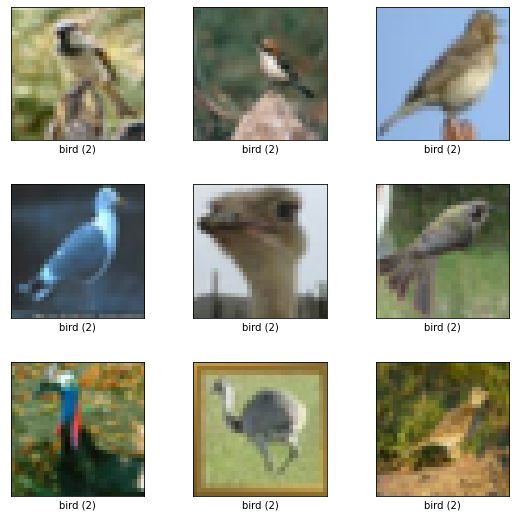

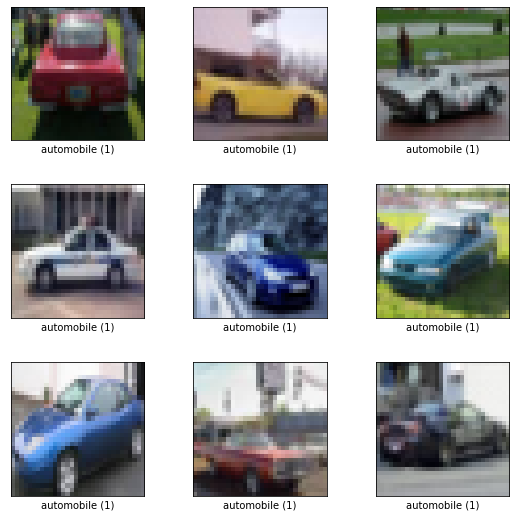

In [35]:
# I already have train_A ... P and val, I will eventually need test set.
# Lets make a small CNN

